In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
health = pd.read_csv('health.csv')
health.head()

,cid,survey,wt20_dual,wt20_dual_q1,qxvers,mood1,mood2,mood3,mood4,mood5,...,sexaslttouch,sexasltrape,dvscreen,wt_compare,strata,strata_q1,bthcntrltype19,insure19r,hhsize,child
0,2000001,20,1014.111405,1298.712123,1,5,5,5,5,4,...,2.0,2.0,2.0,1014.111405,20191402,20191402.0,NaN,1.0,2,2.0
1,2000002,20,60.653305,147.643223,1,5,3,3,3,3,...,2.0,2.0,2.0,60.653305,20191309,20191309.0,NaN,3.0,1,2.0
2,2000003,20,75.367704,108.963691,1,5,4,5,5,5,...,2.0,2.0,2.0,75.367704,20191402,20191402.0,NaN,3.0,1,2.0
3,2000004,20,1015.285504,NaN,2,5,4,5,5,3,...,2.0,2.0,2.0,1015.285504,20199399,NaN,NaN,1.0,3,1.0
4,2000005,20,223.768505,387.054275,1,5,5,5,5,5,...,2.0,2.0,2.0,223.768505,20191207,20191207.0,NaN,NaN,1,2.0


In [4]:
#how much data
health.shape

(8253, 152)

In [5]:
#grabbing columns from data set
columns_we_want = [ "insuredgateway19","generalhealth", "visitnonpcp12m19", "pcp19","didntgetcare19","emp3", "insure5","birthsex","imputed_neighpovgroup4_1418", "fluvaccineshot","everhepavaccine","fruitveg19"]
health[columns_we_want]
health = health[columns_we_want]


In [6]:
#renaming columns
health = health.rename(columns = {'insuredgateway19' : 'insured', 'visitnonpcp12m19' : 'seen_a_doctor_in_12months?', 'pcp19' : 'primary_doctor', 'insure5': 'who_insures_you','emp3': 'employed', 'imputed_neighpovgroup4_1418': 'below_poverty','fruitveg19':'fruit_veggie_servings','everhepavaccine': 'revieved_hepatatis_vaccine'})
health.head()

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didntgetcare19,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,2,1.0,3.0,2.0
1,1.0,2.0,2.0,NaN,2.0,3.0,2.0,2.0,2,2.0,2.0,1.0
2,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2,1.0,3.0,2.0
3,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3,2.0,2.0,2.0
4,1.0,2.0,2.0,1.0,2.0,3.0,NaN,2.0,4,2.0,2.0,2.0


In [7]:
#change columns to int
#integer_columns = ['who_insures_you', 'generalhealth', 'seen_a_doctor_in_12months?',"didntgetcare19","birthsex","primary_doctor?","fruit_veggie_servings","revieved_hepatatis_vaccine?","fluvaccineshot"]
#health[integer_columns] = health[integer_columns].astype(int)
#health.head()

In [8]:
health.describe()

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didntgetcare19,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
count,8213.000000,8227.000000,8238.000000,8207.000000,8205.000000,8172.000000,8026.000000,8224.000000,8253.000000,8178.000000,8243.000000,8028.000000
mean,1.094241,2.696973,1.127337,1.139515,1.880073,1.778512,2.172315,1.561527,2.389192,1.492541,1.823972,2.051570
std,0.292181,1.121782,0.333370,0.346504,0.324896,0.943068,1.302893,0.496230,0.937318,0.499975,0.720247,0.492456
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,2.000000,5.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.000000,4.000000,2.000000,3.000000,3.000000


So if you look at the data set there are categories within the columns. below_poverty has a 1,2,3,4 column that correspond to the % of neighbors below poverty. when i do my calculations rn they are non- descript. so i want to change the values withing the columns to strings so that it describes what each column is. additionally i want to do do this in health_copy1 so that i dont change the original dataset

In [18]:

# how many ppl are insured vs income levels'
#health_copy1 = health.copy()
health_copy1 = health.copy()
new_colnames = []
for col in range(len(new_colnames)):
    new_colnames[col] = new_colnames[col].append.replace("1" ,"10%")
    print (new_colnames)
    
    health_copy1.columns = new_colnames
#health_copy1['below_poverty'].astype(str)
#health_copy1 = health_copy1['below_poverty'].str.replace('1','10%(low)')
#health_copy1 = health_copy1['below_poverty'].replace('2','20%')
#health_copy1 = health_copy1['below_poverty'].replace('3','30%')
#group_poverty = health_copy1.groupby('below_poverty').insured
#insured_poverty = group_poverty.value_counts()
#poverty_insured = round(group_poverty.mean(),3)
#print(poverty_insured)
health_copy1.head()



# 1 is yes and 2 is no 

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didntgetcare19,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,2,1.0,3.0,2.0
1,1.0,2.0,2.0,NaN,2.0,3.0,2.0,2.0,2,2.0,2.0,1.0
2,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2,1.0,3.0,2.0
3,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3,2.0,2.0,2.0
4,1.0,2.0,2.0,1.0,2.0,3.0,NaN,2.0,4,2.0,2.0,2.0


In [30]:
group_poverty = health.groupby('below_poverty').insured
insured_poverty= group_poverty.value_counts(normalize=True)*100
print(insured_poverty)

below_poverty  insured
1              1.0        94.408602
               2.0         5.591398
2              1.0        91.601732
               2.0         8.398268
3              1.0        88.568729
               2.0        11.431271
4              1.0        86.812298
               2.0        13.187702
Name: insured, dtype: float64


As the poverty level increases the number of people uninsured also increases slightly. When the participants filled out the survery there data was complied as 1 meaning yes they are insured to two meaning they aren't insured. There is not a large differences between one neighborhood to the next; however, there is quite a disparity between the low poverty and hgih poverty group.

In [21]:
# how many ppl have a primary care dr vs income level 
group_poverty2 = health.groupby('below_poverty').primary_doctor
poverty_primarydr = round(group_poverty2.mean(),3)
print(poverty_primarydr)
# 1 is yes and 2 is no 

below_poverty
1    1.101
2    1.135
3    1.154
4    1.171
Name: primary_doctor, dtype: float64


In [28]:
group_poverty2 = health.groupby('below_poverty').primary_doctor
dr_poverty = group_poverty2.value_counts(normalize=True)*100
print(dr_poverty)

below_poverty  primary_doctor
1              1.0               89.892473
               2.0               10.107527
2              1.0               86.506790
               2.0               13.493210
3              1.0               84.615385
               2.0               15.384615
4              1.0               82.873377
               2.0               17.126623
Name: primary_doctor, dtype: float64


Text(0.5, 1.0, 'humber of ppl vs type of insurance')

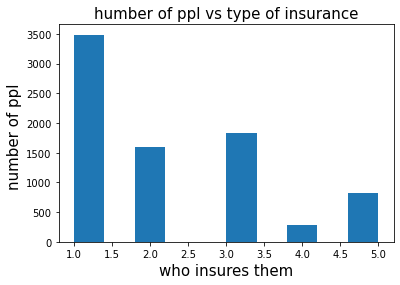

In [19]:
#graphing 
# can you rename numbers here save as subset !!
import matplotlib.pyplot as plt
plt.hist(health['who_insures_you'])
plt.xlabel('who insures them',fontsize=15)
plt.ylabel('number of ppl ',fontsize=15)
plt.title('humber of ppl vs type of insurance',fontsize=15)